In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly
import plotly.express as px
print(plotly.__version__)
print(pd.__version__)

4.7.1
1.0.3


# Startups and Investment Series
## The Question:
### 1. Is there a "total funding" threshold that exists such that startups remain operating?
### 2. Are there any other factors that influence the "operating" status of startups?

In [39]:
investments = pd.read_csv("investments_VC_data.csv", encoding = "ISO-8859-1")
investments.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0


In [40]:
investments.dtypes.head(10)

permalink              object
name                   object
homepage_url           object
category_list          object
 market                object
 funding_total_usd     object
status                 object
country_code           object
state_code             object
region                 object
dtype: object

## As seen above, some headers have unnecessary trailing and leading whitespace

#### The following steps removes the unnecessary whitespace from the headers

In [41]:
col_names = list(investments.columns)
for i in range(len(col_names)):
    col_names[i] = col_names[i].strip()
print(col_names)
# Reassigning column names of original data frame to "cleaned" version
investments.columns = col_names

['permalink', 'name', 'homepage_url', 'category_list', 'market', 'funding_total_usd', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [42]:
investments['country_code'].value_counts().to_frame().head()

,country_code
USA,28793
GBR,2642
CAN,1405
CHN,1239
DEU,968


In [43]:
investments.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

I intend on focusing on analysing the United States as a market for startups because the US is where Silicon Valley is, which is globally known to be the melting pot of innovation and progress for startups.

In [44]:
investments['funding_total_usd'].isnull().value_counts().to_frame()

,funding_total_usd
False,49438


The analysis above shows that there are **4856 rows** within the analytics records that contain **null** values for total funding in USD but **49438 non-null rows**.

In [45]:
investments.isnull().sum().head(12)

permalink                0
name                     1
homepage_url          3449
category_list         3961
market                3968
funding_total_usd        0
status                1314
country_code          5273
state_code           19277
region                5273
city                  6116
funding_rounds           0
dtype: int64

### Representing the status of companies (operating/closed/acquired) in USA

##### Please note that this analysis is done on US companies with non-null 'status' records

In [46]:
# Records with null values in the 'status' column are removed
investments_status = investments.dropna(subset = ['status'])
# Only keeps records with "USA" in the country_code column, ccode stands for country_code
investments_ccode_usa = investments_status[investments_status.country_code.eq("USA")]
investments_ccode_usa.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0,0,0,0,0,0,0,0,0,0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0,0,0,0,0,0,0,0,0,0
11,/organization/1-4-all,1-4 All,NaN,|Entertainment|Games|Software|,Software,-,operating,USA,NC,NC - Other,...,0,0,0,0,0,0,0,0,0,0


In [47]:
investments_ccode_usa.shape

(28233, 39)

In [48]:
investments_ccode_usa = investments_ccode_usa.loc[:, 'name' : 'country_code']
investments_ccode_usa = investments_ccode_usa.drop(["homepage_url", "category_list", "funding_total_usd"], axis = 1)
print(investments_ccode_usa.shape)
investments_ccode_usa.head()

(28233, 4)


,name,market,status,country_code
0,#waywire,News,acquired,USA
1,&TV Communications,Games,operating,USA
4,-R- Ranch and Mine,Tourism,operating,USA
8,004 Technologies,Software,operating,USA
11,1-4 All,Software,operating,USA


In [49]:
#Plotting a bar chart to represent the various categories
company_status = investments_ccode_usa['status'].value_counts().to_frame()
company_status.columns = ["Number of US Startups"]
company_status

,Number of US Startups
operating,23985
acquired,2785
closed,1463


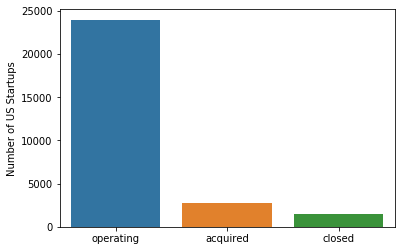

In [50]:
sns.barplot(x = company_status.index, y = "Number of US Startups", data = company_status)

In [51]:
#consider top 10 markets and lowest 10 markets
company_market = investments_ccode_usa['market'].value_counts().to_frame()
#inserting a column into the data frame
company_market.insert(0, "Markets", company_market.index)
company_market.columns = ["Markets", "Number of US Startups"]
company_market_top = company_market.sort_values(by = "Number of US Startups", ascending = False)[:10]
company_market_top = company_market_top.sort_values(by = "Number of US Startups", ascending = True)
company_market_top

,Markets,Number of US Startups
Hardware + Software,Hardware + Software,688
Clean Technology,Clean Technology,692
Health and Wellness,Health and Wellness,719
E-Commerce,E-Commerce,733
Enterprise Software,Enterprise Software,846
Health Care,Health Care,896
Curated Web,Curated Web,934
Mobile,Mobile,1013
Biotechnology,Biotechnology,2645
Software,Software,2912


Text(0, 0.5, 'Number of US Startups')

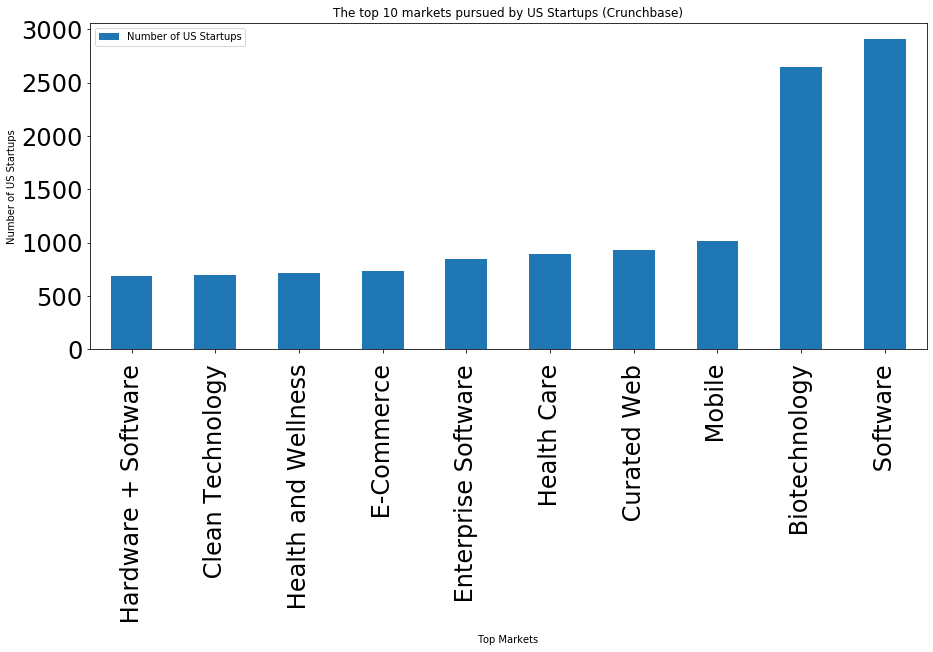

In [52]:
ax = company_market_top.plot(kind = 'bar', figsize = (15, 6), fontsize = 24, title = 'The top 10 markets pursued by US Startups (Crunchbase)')
ax.set_xlabel("Top Markets")
ax.set_ylabel("Number of US Startups")

# Further Analysis on the number of operating/acquired/closed US Startups by State


In [53]:
# Removing records within investments that have null 'status' and 'state_code' values
investments_state = investments.dropna(subset = ['status', 'state_code', 'country_code'])
#Only keeps rows that have country_code == "USA"
investments_state = investments_state[investments_state.country_code.eq("USA")]
investments_state = investments_state.loc[:, "status" : "state_code"]
# iso stands for investments_status_operating
iso = investments_state[investments_state.status == "operating"]
isa = investments_state[investments_state.status == "acquired"]
isc = investments_state[investments_state.status == "closed"]
iso = iso['state_code'].value_counts().to_frame()
isa = isa['state_code'].value_counts().to_frame()
isc = isc['state_code'].value_counts().to_frame()
fig = px.pie(iso, values = "state_code", names = iso.index, title = "Distribution of OPERATING US Startups by state", width = 750, height = 750)
fig.show()

In [54]:
fig_isa = px.pie(isa, values = "state_code", names = isa.index, title = "Distribution of ACQUIRED US Startups by state", width = 750, height = 750)
fig_isa.show()

In [55]:
fig_isc = px.pie(isc, values = "state_code", names = isc.index, title = "Distribution of CLOSED US Startups by state", width = 750, height = 750)
fig_isc.show()

## Analyzing the above results
#### Top 5 states in the US with
##### Operating startups: CA, NY, MA, TX, FL
##### Acquired startups: CA, NY, MA, TX, WA
##### Closed startups: CA, NY, MA, TX, WA

###### Hence, generally speaking, the $\color{green}{\text{top three states}}$ where entrepreneurs establish startups are: $\color{green}{\text{CA, NY and MA}}$. Other states that $\color{purple}{\text{come close}}$ are $\color{purple}{\text{TX, FL and WA}}$. This is a good gauge for entrepreneurs-to-be when deciding where to launch a startup. As it can be seen, the $\color{green}{\text{West and East Coast}}$ (perhaps with Texas as an exception) are the $\color{green}{\text{best}}$ places to take that risk ;) 

## Visualizing the range of funding US startups receive based on the startups' operating status using horizontal range bar charts

In [56]:
# Columns needed: funding_total_usd, status, country_code == USA
investments_fs = investments[investments.country_code == 'USA']
investments_fs = investments_fs[["funding_total_usd", "status"]]
investments_fs = investments_fs.dropna(subset = ["funding_total_usd", "status"])
investments_fs.head()

,funding_total_usd,status
0,"17,50,000",acquired
1,"40,00,000",operating
4,"60,000",operating
8,-,operating
11,-,operating


### As it can be seen, the funding_total_usd column has 'null' values in the form of hyphens that have to be removed (cleaned)

In [57]:
investments_fs.dtypes

funding_total_usd    object
status               object
dtype: object

In [58]:
# String manipulation in dataframes
investments_fs['funding_total_usd'] = investments_fs.funding_total_usd.str.strip()
investments_fs['status'] = investments_fs.status.str.upper()
investments_fs.head()

,funding_total_usd,status
0,"17,50,000",ACQUIRED
1,"40,00,000",OPERATING
4,"60,000",OPERATING
8,-,OPERATING
11,-,OPERATING


In [59]:
# Drops the rows that has values equal to hyphen by using the not equal (.ne) method
investments_fs = investments_fs[investments_fs.funding_total_usd.ne('-')]
investments_fs 

,funding_total_usd,status
0,"17,50,000",ACQUIRED
1,"40,00,000",OPERATING
4,"60,000",OPERATING
13,"17,50,000",OPERATING
16,"20,50,000",OPERATING
...,...,...
49426,"86,65,50,786",OPERATING
49427,"2,50,00,000",OPERATING
49429,"3,42,75,015",OPERATING
49431,"15,10,500",OPERATING


In [70]:
for status, df in investments_fs.groupby('status'):
    print(status)
    print(df)
# we can use g.get_group('<insert status>') to get individual dataframes based on the operating status of the startups

ACQUIRED
      funding_total_usd    status
0             17,50,000  ACQUIRED
20            25,35,000  ACQUIRED
27            12,50,000  ACQUIRED
62          1,40,00,000  ACQUIRED
151         8,50,00,000  ACQUIRED
...                 ...       ...
49246         17,00,000  ACQUIRED
49273       4,56,93,276  ACQUIRED
49309         33,50,000  ACQUIRED
49325       5,91,39,710  ACQUIRED
49400       5,52,00,000  ACQUIRED

[2497 rows x 2 columns]
CLOSED
      funding_total_usd  status
30               50,000  CLOSED
74               50,000  CLOSED
117           34,52,941  CLOSED
123              50,000  CLOSED
131            1,18,000  CLOSED
...                 ...     ...
49348         15,00,000  CLOSED
49372         17,00,000  CLOSED
49394         27,00,000  CLOSED
49414          8,00,000  CLOSED
49419         22,57,464  CLOSED

[1251 rows x 2 columns]
OPERATING
      funding_total_usd     status
1             40,00,000  OPERATING
4                60,000  OPERATING
13            17,50,000  OP

In [61]:
investments_fs_op = investments_fs[investments_fs.status.eq('OPERATING')]
investments_fs_op.funding_total_usd = investments_fs_op.funding_total_usd.str.replace(',', '')
# to_numeric converts all the object types to numeric types (int64 in this case)
investments_fs_op.funding_total_usd = pd.to_numeric(investments_fs_op.funding_total_usd)
investments_fs_op.dtypes

C:\Users\cyuvr\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



funding_total_usd     int64
status               object
dtype: object

In [62]:
investments_fs_op = investments_fs_op.sort_values('funding_total_usd', ascending = False)
investments_fs_op.head()

,funding_total_usd,status
45815,30079503000,OPERATING
7977,5162513431,OPERATING
15315,3500000000,OPERATING
38289,2600000000,OPERATING
14705,2425700000,OPERATING


In [63]:
fig = px.box(investments_fs_op, y="funding_total_usd", points="all")
fig.show()

## <span style='color:blue'>Summary statistics for total funding (in USD) of operating US startups</span>
#### <span style='color:green'>Maximum</span> total funding: 30.08 Billion
#### <span style='color:red'>Minimum</span> total funding: 30 
#### Third Quartile: 11 Million
#### Median: 2.4 Million
#### First Quartile: 500, 000

In [64]:
investments_fs_aq = investments_fs[investments_fs.status.eq('ACQUIRED')]
investments_fs_aq.dtypes

funding_total_usd    object
status               object
dtype: object

In [65]:
investments_fs_aq.funding_total_usd = investments_fs_aq.funding_total_usd.str.replace(',', '')
# to_numeric converts all the object types to numeric types (int64 in this case)
investments_fs_aq.funding_total_usd = pd.to_numeric(investments_fs_aq.funding_total_usd)
investments_fs_aq.dtypes

C:\Users\cyuvr\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



funding_total_usd     int64
status               object
dtype: object

In [66]:
investments_fs_op = investments_fs_op.sort_values('funding_total_usd', ascending = False)
fig = px.box(investments_fs_aq, y="funding_total_usd", points="all")
fig.show()

## <span style='color:blue'>Summary statistics for total funding (in USD) of acquired US startups</span>
#### <span style='color:green'>Maximum</span> total funding: 5.7 Billion
#### <span style='color:red'>Minimum</span> total funding: 1265 
#### Third Quartile: 24.7 Million
#### Median: 9.9 Million
#### First Quartile: 3 Million

In [67]:
investments_fs_cl = investments_fs[investments_fs.status.eq('CLOSED')]
investments_fs_cl.funding_total_usd = investments_fs_cl.funding_total_usd.str.replace(',', '')
# to_numeric converts all the object types to numeric types (int64 in this case)
investments_fs_cl.funding_total_usd = pd.to_numeric(investments_fs_cl.funding_total_usd)
investments_fs_op = investments_fs_op.sort_values('funding_total_usd', ascending = False)
fig = px.box(investments_fs_cl, y="funding_total_usd", points="all")
fig.show()

## <span style='color:blue'>Summary statistics for total funding (in USD) of closed US startups</span>
#### <span style='color:green'>Maximum</span> total funding: 1.57 Billion
#### <span style='color:red'>Minimum</span> total funding: 1000 
#### Third Quartile: 7 Million
#### Median: 1.5 Million
#### First Quartile: 300, 000

In [68]:
closed_series = pd.Series(['1.57B', '1000', '7M', '1.5M', '0.3M'], index = ['Max Funding', 'Min Funding', '3rd Quartile', 'Median', '1st Quartile'], name = 'Closed')
operating_series = pd.Series(['30.1B', '30', '11M', '2.4M', '0.5M'], index = ['Max Funding', 'Min Funding', '3rd Quartile', 'Median', '1st Quartile'], name = 'Operating')
acquired_series = pd.Series(['5.7B', '1265', '24.7M', '9.9M', '3M'], index = ['Max Funding', 'Min Funding', '3rd Quartile', 'Median', '1st Quartile'], name = 'Acquired')

In [69]:
summary = pd.concat([closed_series, operating_series, acquired_series], axis = 1)
summary

,Closed,Operating,Acquired
Max Funding,1.57B,30.1B,5.7B
Min Funding,1000,30,1265
3rd Quartile,7M,11M,24.7M
Median,1.5M,2.4M,9.9M
1st Quartile,0.3M,0.5M,3M


## <span style='color:blue'>Project Summary</span>

---

#### As it can be seen, there is not enough data in the dataset to analyze whether other factors (factors other than total funding) affect the operating status of startups. As for whether the total funding in USD affects the operating status, the <span style='background:yellow'>median funding for operating startups exceeds that of closed startups by around 1 Million USD at 2.4 Million.</span> 

#### The <span style='background:yellow'>median total funding of acquired startups is much higher than operating and closed startups at 9.9 Million</span>, which makes sense because these startups were acquired. A <span style='background:yellow'>summary table</span> of the funding in USD of startups in the US based on the operating status of startups can be seen in the table <span style='background:yellow'>above</span>.

#### Since the <span style='background:pink'>first and third quartile</span> of the <span style='background:pink'>total funding in USD of closed startups overlaps with that of operating startups by 64% (raw value of 7 Million USD)</span>, total funding in USD is not an accurate metric to classify the operating status of startups in the US. Although it would be reasonable to deduce that <span style='background:pink'>upon reaching a total funding of 7 Million USD (3rd quartile of closed startups), there is a good chance that the US Startup will continue to operate or even be acquired</span>. 

---

### <span style='color:Blue'>The top markets operating US startups are in are as follows:</span>
##### 1. <span style='color:green'>Software</span>
##### 2. <span style='color:green'>Biotechnology</span>
##### 3. <span style='color:green'>Mobile</span>
##### 4. Curated Web
##### 5. Healthcare
##### 6. Enterprise Software
##### 7. E-commerce
##### 8. Health & Wellness
##### 9. Clean Technology
##### 10. Hardware + Software

---

### <span style='color:Blue'>Number of US Startups in each status:</span>
##### Operating: 23985
##### Acquired: 2785
##### Closed: 1463

---


### <span style='color:blue'>Top 5 states in the US with</span>
##### <span style='color:green'>Operating</span> startups: <span style='color:green'>CA, NY, MA,</span> TX, FL
##### <span style='color:green'>Acquired</span> startups: <span style='color:green'>CA, NY, MA,</span> TX, WA
##### <span style='color:red'>Closed</span> startups: <span style='color:red'>CA, NY, MA,</span> TX, WA

###### Hence, generally speaking, the $\color{green}{\text{top three states}}$ where entrepreneurs establish startups are: $\color{green}{\text{CA, NY and MA}}$. Other states that $\color{purple}{\text{come close}}$ are $\color{purple}{\text{TX, FL and WA}}$. This is a good gauge for entrepreneurs-to-be when deciding where to launch a startup. As it can be seen, the $\color{green}{\text{West and East Coast}}$ (perhaps with Texas as an exception) are the $\color{green}{\text{best}}$ places to take that risk ;) 